## Libraries

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import cv2 as cv
import numpy as np
import random

from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
def f1_score(dict):
  f1_avg = 0
  for i in dict.keys():
    f1 = (2*dict[i][0]*dict[i][1])/(dict[i][0]+dict[i][1])
    print(i,round(f1,3))
    f1_avg += f1
  print(round(f1_avg/4,3))

In [ ]:
def label_inspector(file_list):

  cls_names = []
  total_images = 0


  for file in file_list:
    base_path = '/content/gdrive/My Drive/ultralytics/yolov5/' + '/'.join(file.split('/')[0:-2])

    total_images = total_images + 1

    file = file.rstrip('\n').split('/')[-1]
    file = file.split('.')[0] + '.xml'

    infile_xml = open(base_path + '/annotations/xmls/' + file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    main_labels = []

    for obj in root.iter('object'):
      cls_name = obj.find('name').text
      #if cls_name in mainTypes:
      cls_names.append(cls_name)

  print("total")
  print("# of images：" + str(total_images))
  print("# of labels：" + str(len(cls_names)))


  count_dict = collections.Counter(cls_names)
  cls_count = []
  for damageType in mainTypes:
      print(str(damageType) + ' : ' + str(count_dict[damageType]))
      cls_count.append(count_dict[damageType])
      
  sns.set_palette("winter", 8)
  sns.barplot(mainTypes, cls_count)


In [ ]:
 %cd gdrive/My Drive/ultralytics
#! git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt  # install

/content/gdrive/My Drive/ultralytics
/content/gdrive/My Drive/ultralytics/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.3 MB/s 


## Descriptive

In [ ]:
base_path = os.getcwd() + '/datasets/roadColombia/Colombia'
damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]
mainTypes=["D00", "D10", "D20", "D40"]

In [ ]:
# the number of total images and total labels.
cls_names = []
cls_names_interest = []
total_images = 0

file_list = [filename for filename in os.listdir(base_path + '/annotations/xmls/') if not filename.startswith('.')]

images_discard = []

for file in file_list:
  total_images = total_images + 1
  if file =='.DS_Store':
    pass
  else:
    infile_xml = open(base_path + '/annotations/xmls/' +file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    main_labels = []

    for obj in root.iter('object'):
      cls_name = obj.find('name').text
      cls_names.append(cls_name)

      if cls_name in mainTypes:
        main_labels.append(cls_name)
        cls_names_interest.append(cls_name)
    if main_labels == []:
     images_discard.append(file)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))
print("# of labels of interest：" + str(len(cls_names_interest)))

total
# of images：858
# of labels：2009
# of labels of interest：1784


D00 : 238
D01 : 112
D10 : 136
D11 : 60
D20 : 565
D40 : 845
D43 : 43
D44 : 10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


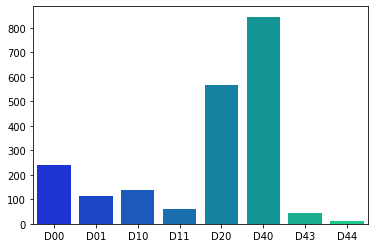

In [ ]:
# the number of each class labels.
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

## Annotations in Yolo format

In [ ]:
images_discard = [i[:-3]+'jpg' for i in images_discard]

In [ ]:
path = "/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/Colombia/images"
dir_list = os.listdir(path)

images_list = []
for i in dir_list:
  if i not in images_discard: 
    prefix = "datasets/roadColombia/Colombia/images/"
    i = prefix + i
    images_list.append(i)

print(len(images_list))

775


In [ ]:
with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/Colombia/images.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(images_list))

In [ ]:
!python3 scripts/xml2yolo.py --class_file "datasets/roadColombia/damage_classes.txt" --input_file "datasets/roadColombia/Colombia/images.txt"

total files: 775
Traceback (most recent call last):
  File "scripts/xml2yolo.py", line 120, in <module>
    main()
  File "scripts/xml2yolo.py", line 97, in main
    yoloOutput = open(txtFile,"w")
  File "/usr/lib/python3.7/_bootlocale.py", line 33, in getpreferredencoding
    def getpreferredencoding(do_setlocale=True):
KeyboardInterrupt


In [ ]:
def draw_images(image_file):
    img = cv.imread(base_path + '/images/' + image_file)
    
    infile_xml = open(base_path + '/annotations/xmls/' +image_file.split('.')[0] + '.xml')
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv.FONT_HERSHEY_SIMPLEX

        # put text
        cv.putText(img,cls_name,(xmin,ymin-10),font,1,(255,0,0),1,cv.LINE_AA)

        # draw bounding box
        cv.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0),1)
    return img

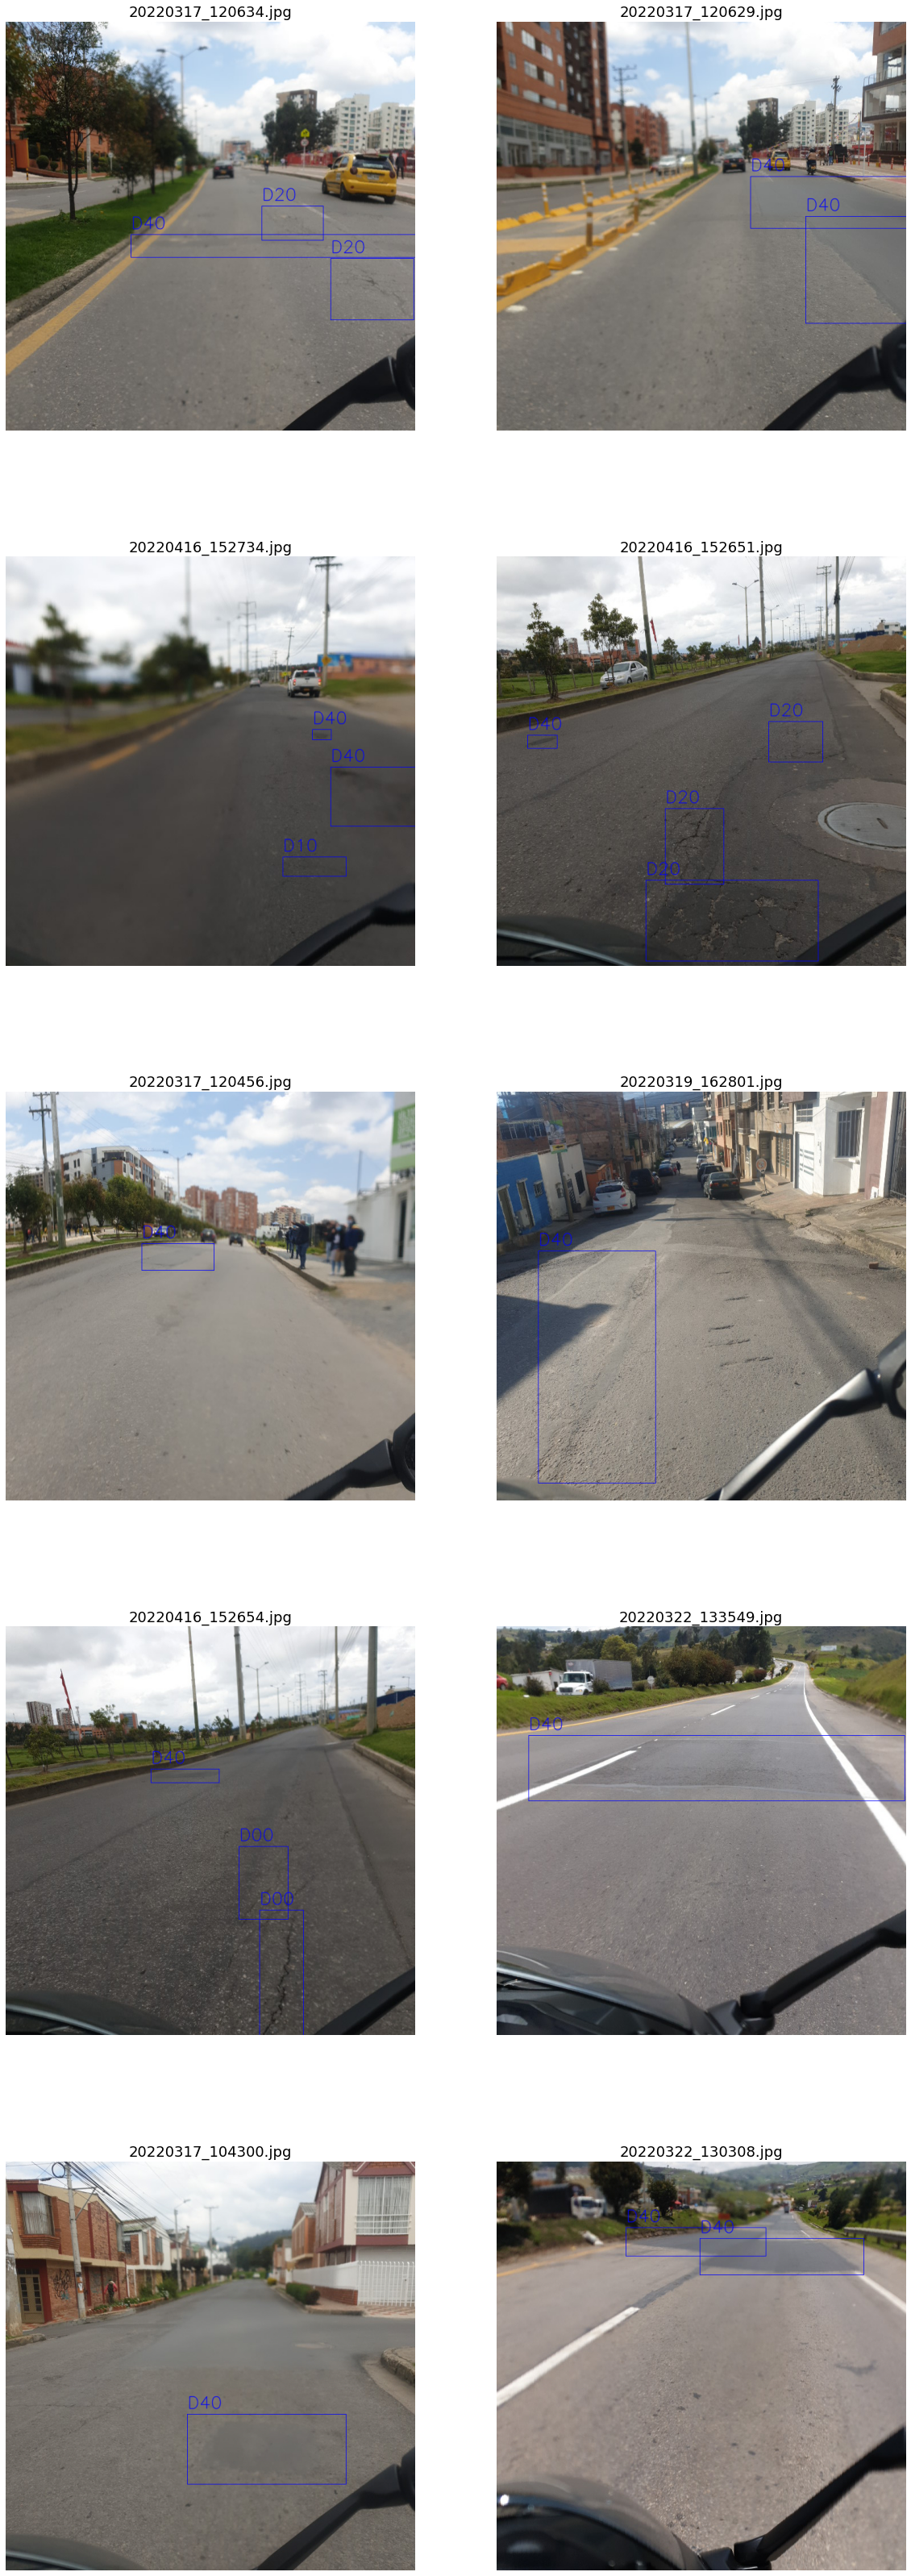

In [ ]:
tmp = []
file = open(base_path + "/images.txt", 'r')
for line in file:
  line = line.rstrip('\n').split('/')[-1]
  tmp.append(line)

random.shuffle(tmp)
plots = 10
lote = tmp[0:plots]


fig = plt.figure(figsize=(20,12*plots))
for number, image in enumerate(lote):
  img = draw_images(image)
  plt.subplot(plots,2,number+1)
  plt.axis('off')
  plt.title(image, fontsize=18)
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Testing Road2020 winner model

In [ ]:
# inference using best model
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/Colombia/road.yml --augment --half --task val 

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/Colombia/road.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
fatal: cannot change to '/content/gdrive/My': No such file or directory
YOLOv5 🚀 2022-6-28 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 52.5MB/s]
val: Scanning '/content/gdrive/My Drive/ultralytics/yolov5/datasets/roadColombia/Colombia/images' images and labels...775 found, 0 missing, 1 empty, 0 corrupt: 100% 775/775 [03:56<00:00,  3.28it/s]
val: New cache created: /content/gdrive/My Drive/ultralytics/yolov5/datasets/roadColombia/Colombia/images.cache
               Class     Images     Label

In [ ]:
# inference using best ensemble model
!python detect.py --weights weights/IMSC/last_95_448_32_aug2.pt  weights/IMSC/last_95_640_16.pt  weights/IMSC/last_120_640_32_aug2.pt weights/IMSC/last_100_100_640_16.pt --img 640 --source /content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/Colombia/images/ --agnostic-nms --augment


## Train/test split

In [ ]:
file_list = open(base_path + "/images.txt", 'r')
file_list = [file.rstrip('\n') for file in file_list]

In [ ]:
train_images, test_images = train_test_split(file_list, test_size = 0.15, random_state = 1)
train_images, val_images = train_test_split(train_images, test_size = 0.2, random_state = 1)

In [ ]:
print(f"Train size: {len(train_images)} \n Valid size: {len(val_images)} \n Test size: {len(test_images)}")

Train size: 526 
 Valid size: 132 
 Test size: 117


In [ ]:
with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(train_images))

with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/val.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(val_images))

with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/test.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(test_images))

total
# of images：526
# of labels：1296
D00 : 156
D10 : 91
D20 : 376
D40 : 581


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


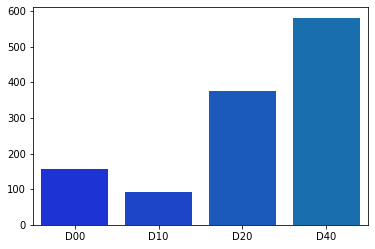

In [ ]:
file_train = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train.txt", 'r')
label_inspector(file_train)

total
# of images：132
# of labels：334
D00 : 39
D10 : 26
D20 : 105
D40 : 141


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


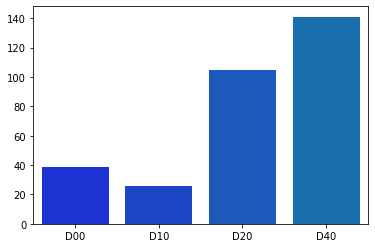

In [ ]:
file_val = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/val.txt", 'r')
label_inspector(file_val)

total
# of images：117
# of labels：280
D00 : 43
D10 : 19
D20 : 84
D40 : 123


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


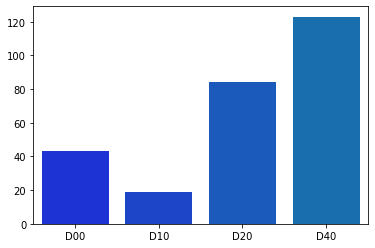

In [ ]:
file_test = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/test.txt", 'r')
label_inspector(file_test)

In [ ]:
# the number of each class labels.
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [ ]:
import pandas as pd
dict_sets = {'train': [156,91,376,581], 'val':[39,26,105,141], 'test':[43,19,84,123]}
df = pd.DataFrame.from_dict(dict_sets)
df.index = ['D00','D10','D20','D40']
df = df.reset_index().rename(columns = {'index':'type'})
df =pd.melt(df, id_vars=['type'], value_vars=['train','val','test'])
df

type variable  value
0   D00    train    156
1   D10    train     91
2   D20    train    376
3   D40    train    581
4   D00      val     39
5   D10      val     26
6   D20      val    105
7   D40      val    141
8   D00     test     43
9   D10     test     19
10  D20     test     84
11  D40     test    123

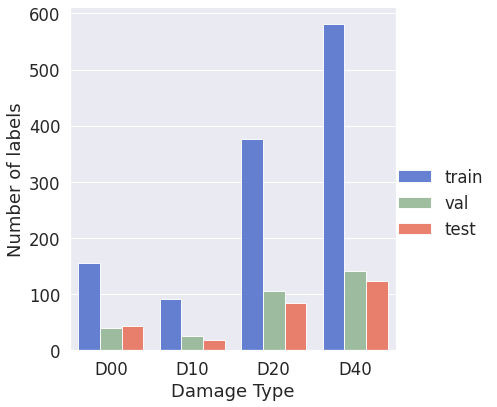

In [ ]:
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(font_scale=1.5)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="type", y="value", hue="variable",
     palette=["royalblue","darkseagreen","tomato"], alpha=.9, height=6
)
g.despine(left=False, right=False, top=True)
g.set_axis_labels("Damage Type", "Number of labels")
g.legend.set_title("")
g.savefig('distribution.pdf')

## Validación del modelo GCRD2020 en Imagenes Colombia

In [ ]:
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml --augment --half --task test --name exptest

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exptest, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-269-gf76a78e7 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 15.2MB/s]
test: Scanning '/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/test' images and labels...117 found, 0 missing, 0 empty, 0 corrupt: 100% 117/117 [02:31<00:00,  1.30s/it]
test: New cache created: /content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0% 0/4 [00:00<?, ?it/s]tcmalloc: large alloc 11560550

In [ ]:
dict = {'D00':[0.442,0.419],
        'D10':[0.36,0.368],
        'D20':[0.432,0.381],
        'D40':[0.187,0.138]}

f1_score(dict)

D00 0.43
D10 0.364
D20 0.405
D40 0.159
0.339


In [ ]:
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml --augment --half --task val --name expval

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=expval, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-269-gf76a78e7 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
val: Scanning '/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/val.cache' images and labels... 132 found, 0 missing, 0 empty, 0 corrupt: 100% 132/132 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0% 0/5 [00:00<?, ?it/s]tcmalloc: large alloc 1156055040 bytes == 0x561aa000 @  0x7f35f6033b6b 0x7f35f6053379 0x7f357ebfad57 0x7f357ebe8bc3 0x7f35a92c7ea9 0x7f35a8c71523 0x7f35a91fd837 0x7f35a9202373

In [ ]:
dict = {'D00':[0.394,0.317],
        'D10':[0.553,0.385],
        'D20':[0.458,0.248],
        'D40':[0.303,0.142]}

f1_score(dict)

D00 0.351
D10 0.454
D20 0.322
D40 0.193
0.33


In [ ]:
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml --augment --half --task train --name exptrain

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/data/road_col.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=train, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exptrain, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-269-gf76a78e7 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
train: Scanning '/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train.cache' images and labels... 526 found, 0 missing, 0 empty, 0 corrupt: 100% 526/526 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0% 0/17 [00:00<?, ?it/s]tcmalloc: large alloc 1156055040 bytes == 0x4cdf4000 @  0x7f4c23839b6b 0x7f4c23859379 0x7f4bac400d57 0x7f4bac3eebc3 0x7f4bd6acdea9 0x7f4bd6477523 0x7f4bd6a03837 0x7f4

In [ ]:
dict = {'D00':[0.343,0.391],
        'D10':[0.408,0.319],
        'D20':[0.424,0.301],
        'D40':[0.282,0.149]}

f1_score(dict)

D00 0.365
D10 0.358
D20 0.352
D40 0.195
0.318


## Augmentation 1: Including global images

In [ ]:
base_path2 = os.getcwd() + '/datasets/roadGlobal'

In [ ]:
# the number of total images and total labels.
cls_names = []
cls_names_interest = []
total_images = 0

file_list = [filename for filename in os.listdir(base_path2 + '/annotations/xmls/') if not filename.startswith('.')]

images_discard = []

for file in file_list:
  total_images = total_images + 1
  if file =='.DS_Store':
    pass
  else:
    infile_xml = open(base_path2 + '/annotations/xmls/' +file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    main_labels = []

    for obj in root.iter('object'):
      cls_name = obj.find('name').text
      cls_names.append(cls_name)

      if cls_name in mainTypes:
        main_labels.append(cls_name)
        cls_names_interest.append(cls_name)
    if main_labels == []:
     images_discard.append(file)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))
print("# of labels of interest：" + str(len(cls_names_interest)))

total
# of images：21041
# of labels：34702
# of labels of interest：25046


In [ ]:
len(images_discard)

8846

D00 : 6592
D01 : 179
D10 : 4446
D11 : 45
D20 : 8381
D40 : 5627
D43 : 793
D44 : 5057


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


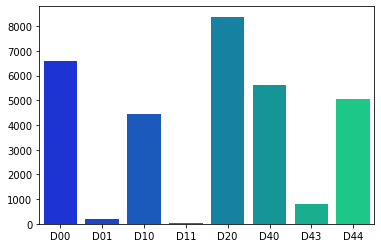

In [ ]:
# the number of each class labels.
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [ ]:
images_discard = [i[:-3]+'jpg' for i in images_discard]

In [ ]:
path = "/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadGlobal/images"
dir_list = os.listdir(path)

images_list = []
for i in dir_list:
  if i not in images_discard: 
    prefix = "datasets/roadGlobal/images/"
    i = prefix + i
    images_list.append(i)

print(len(images_list))

12146


In [ ]:
for i in images_discard:
  if '003557' in i:
    print(i)

Czech_003557.jpg
India_003557.jpg
Japan_003557.jpg


### Extension 1

In [ ]:
## Choose a random sample from the global dataset
size = 1000
images_list = random.sample(images_list, 1000)

In [ ]:
file_train = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train.txt", 'r')
file_train = [file.rstrip('\n') for file in file_train]

In [ ]:
file_train = file_train + images_list
print(len(file_train))

1526


In [ ]:
with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(file_train))

total
# of images：1526
# of labels：2897
D00 : 463
D10 : 308
D20 : 776
D40 : 851


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


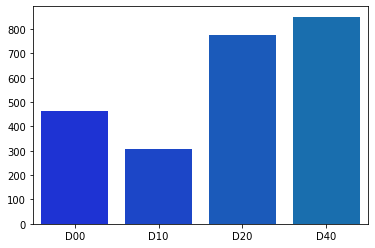

In [ ]:
file_train = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended.txt", 'r')
label_inspector(file_train)

In [ ]:
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/data/road_col_extended.yml --augment --half --task train --name exptrainExtended

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/data/road_col_extended.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=train, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exptrainExtended, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-269-gf76a78e7 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 18.0MB/s]
train: Scanning '/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended' images and labels...1526 found, 0 missing, 417 empty, 0 corrupt: 100% 1526/1526 [09:07<00:00,  2.79it/s]
train: New cache created: /content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0% 0/48

In [ ]:
dict = {'D00':[0.343,0.391],
        'D10':[0.408,0.319],
        'D20':[0.424,0.301],
        'D40':[0.282,0.149]}

f1_score(dict)

### Extensión 2


In [ ]:
## Choose a random sample from the global dataset
size = 5000
images_list = random.sample(images_list, size)

In [ ]:
file_train = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train.txt", 'r')
file_train = [file.rstrip('\n') for file in file_train]

In [ ]:
file_train = file_train + images_list
print(len(file_train))

5526


In [ ]:
for i in file_train:
  if '003557' in i:
    print(i)

In [ ]:
with open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended2.txt", 'w') as totxt_file:
    totxt_file.write("\n".join(file_train))

total
# of images：5526
# of labels：9504
D00 : 1665
D10 : 1124
D20 : 2427
D40 : 1915


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


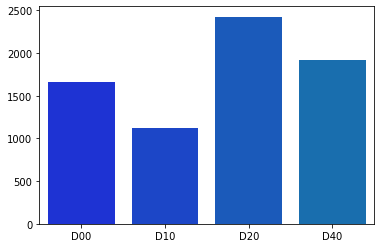

In [ ]:
file_train = open("/content/gdrive/MyDrive/ultralytics/yolov5/datasets/roadColombia/train_extended2.txt", 'r')
label_inspector(file_train)

In [ ]:
!python val.py --weights weights/IMSC/last_95.pt --img 640 --data /content/gdrive/MyDrive/ultralytics/yolov5/data/road_col_extended2.yml --augment --half --task train --name exptrainExtended2

val: data=/content/gdrive/MyDrive/ultralytics/yolov5/data/road_col_extended2.yml, weights=['weights/IMSC/last_95.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=train, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exptrainExtended2, exist_ok=False, half=True, dnn=False
fatal: cannot change to '/content/gdrive/My': No such file or directory
YOLOv5 🚀 2022-6-28 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5x summary: 484 layers, 88410801 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 17.1MB/s]
train: Scanning '/content/gdrive/My Drive/ultralytics/yolov5/datasets/roadColombia/train_extended2' images and labels...5526 found, 0 missing, 2041 empty, 0 corrupt: 100% 5526/5526 [04:47<00:00, 19.21it/s]
train: New cache created: /content/gdrive/My Drive/ultralytics/yolov5/datasets/roadColombia/train_extended2.cache
               Class     Im

In [ ]:
dict = {'D00':[0.663, 0.712],
        'D10':[0.688, 0.508],
        'D20':[0.79, 0.751],
        'D40':[0.668, 0.583]}

f1_score(dict)

D00 0.687
D10 0.584
D20 0.77
D40 0.623
0.666
